## Estimación de frecuencia cardíaca a partir de señal RED

Este notebook carga y procesa archivos CSV que contienen señales PPG del canal rojo (`RED`) registradas por un pulsioxímetro. El objetivo es estimar la frecuencia cardíaca para cada archivo mediante los siguientes pasos:

1. **Carga de datos**  
   Se recorre una carpeta con archivos CSV y se extrae el tiempo (en milisegundos) y la señal RED.

2. **Preprocesamiento**  
   - El tiempo se convierte a segundos y se ajusta para que empiece en cero.  
   - Se aplica una media móvil simple para suavizar la señal.

3. **Detección de picos**  
   Se detectan picos en la señal RED suavizada usando `find_peaks`, ajustando los parámetros de `distance` y `prominence` para mejorar la detección de latidos.

4. **Cálculo de frecuencia cardíaca**  
   Si se detectan suficientes picos, se calcula el intervalo medio entre ellos y se convierte a BPM mediante:
   
   HR = 60/intervalo medio entre picos (s)

5. **Visualización**  
   Se representa gráficamente la señal RED con los picos detectados, y se imprime la HR estimada en la consola.



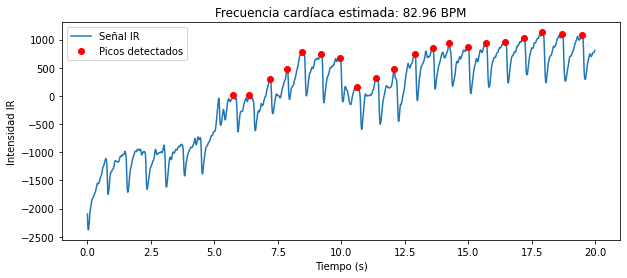

Frecuencia cardíaca estimada: 82.96 BPM


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Cargar los datos
ruta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_77_2.csv"
df = pd.read_csv(ruta)

# Extraer tiempo e IR
tiempo = df['Tiempo (ms)'].values  # En milisegundos
ir_signal = df['IR'].values  

# Normalizar tiempo a segundos
tiempo = (tiempo - tiempo[0]) / 1000  

# Filtrado simple (opcional, según cómo se vea la señal)
ir_signal = ir_signal - np.mean(ir_signal)  # Centrar la señal

# Detectar picos
picos, _ = find_peaks(ir_signal, height=np.mean(ir_signal), distance=30)  

# Calcular intervalos RR (tiempo entre picos)
intervalos_rr = np.diff(tiempo[picos])  # En segundos

# Calcular frecuencia cardíaca
hr = 60 / np.mean(intervalos_rr)  

# Graficar la señal con los picos detectados
plt.figure(figsize=(10, 4))
plt.plot(tiempo, ir_signal, label="Señal IR")
plt.plot(tiempo[picos], ir_signal[picos], "ro", label="Picos detectados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad IR")
plt.legend()
plt.title(f"Frecuencia cardíaca estimada: {hr:.2f} BPM")
plt.show()

print(f"Frecuencia cardíaca estimada: {hr:.2f} BPM")


raw_data_91_91.csv  Frecuencia cardíaca estimada: 89.28 BPM


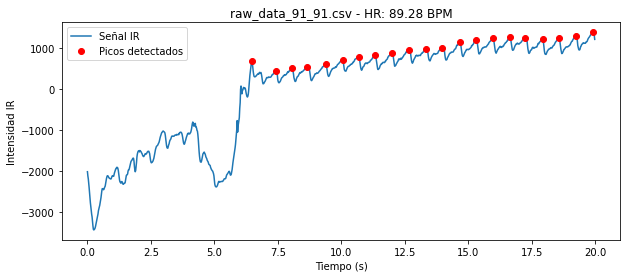

raw_data_92_76.csv  Frecuencia cardíaca estimada: 84.56 BPM


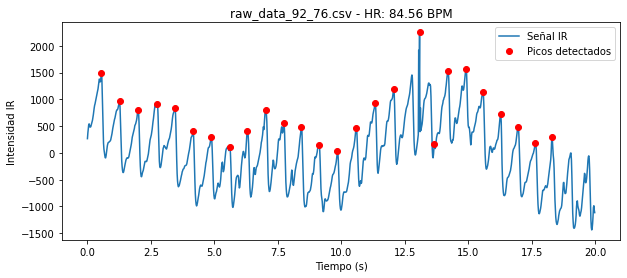

raw_data_93_100.csv  Frecuencia cardíaca estimada: 64.18 BPM


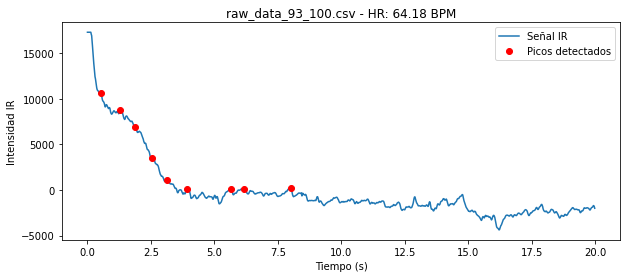

raw_data_95_77_2.csv  Frecuencia cardíaca estimada: 82.96 BPM


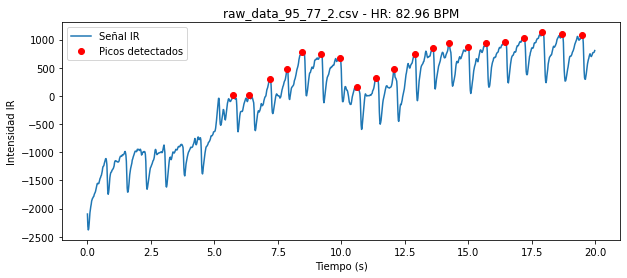

raw_data_95_80.csv  Frecuencia cardíaca estimada: 43.93 BPM


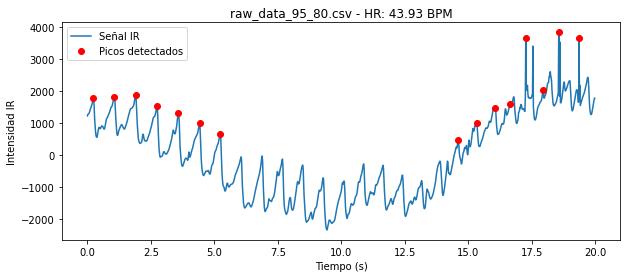

raw_data_95_81_papa.csv  Frecuencia cardíaca estimada: 80.41 BPM


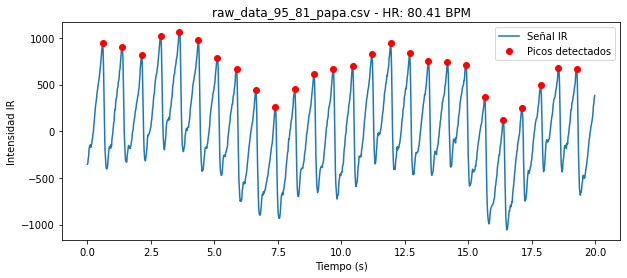

raw_data_95_99.csv  Frecuencia cardíaca estimada: 60.29 BPM


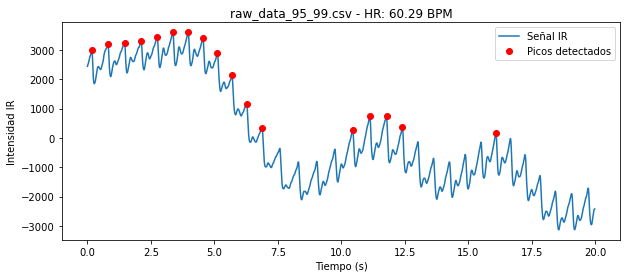

raw_data_96_69.csv  Frecuencia cardíaca estimada: 69.63 BPM


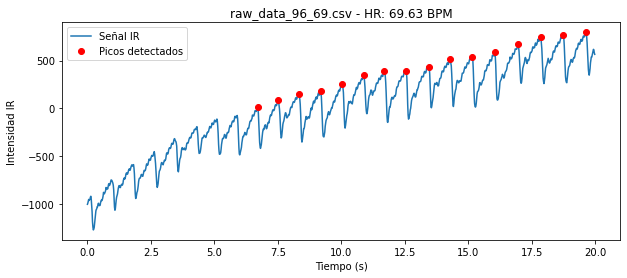

raw_data_98_81.csv  Frecuencia cardíaca estimada: 65.05 BPM


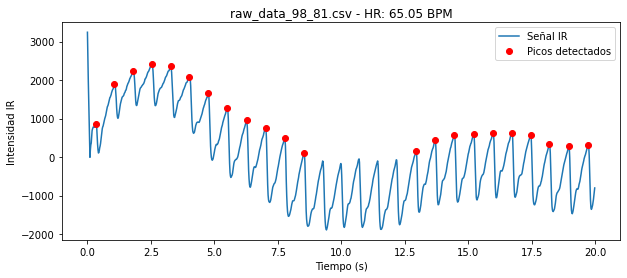

raw_data_99_75.csv  Frecuencia cardíaca estimada: 75.12 BPM


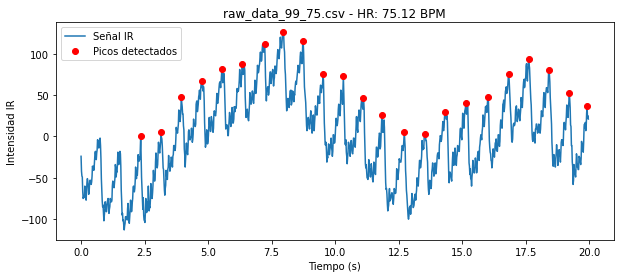

raw_data_99_91.csv  Frecuencia cardíaca estimada: 34.67 BPM


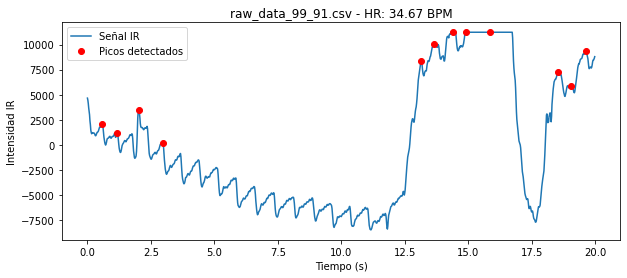

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

# Ruta de la carpeta con los archivos procesados
ruta_carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Recorrer todos los archivos CSV en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)

        # Cargar los datos
        df = pd.read_csv(ruta_archivo)

        # Extraer tiempo e IR
        tiempo = df['Tiempo (ms)'].values
        ir_signal = df['IR'].values  

        # Normalizar tiempo a segundos
        tiempo = (tiempo - tiempo[0]) / 1000  

        # Centrar la señal (eliminar offset)
        ir_signal = ir_signal - np.mean(ir_signal)  

        # Detectar picos
        picos, _ = find_peaks(ir_signal, height=np.mean(ir_signal), distance=30)  

        # Si hay suficientes picos, calcular HR
        if len(picos) > 1:
            intervalos_rr = np.diff(tiempo[picos])  # Diferencias entre picos (en s)
            hr = 60 / np.mean(intervalos_rr)  # BPM
        else:
            hr = np.nan  # Si no hay suficientes picos, marcar como NaN

        
        print(f"{archivo}  Frecuencia cardíaca estimada: {hr:.2f} BPM")

        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, ir_signal, label="Señal IR")
        plt.plot(tiempo[picos], ir_signal[picos], "ro", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad IR")
        plt.legend()
        plt.title(f"{archivo} - HR: {hr:.2f} BPM")
        plt.show()
